In [ ]:
pip install pandas

In [5]:
import pandas as pd

In [28]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\helpers.csv")
# Review the data
print(df.head())

   record_id                          data_set_name  \
0    1428646                     Agent/Broker (ABA)   
1      21643  Certified Application Counselor (CAC)   
2    1362234                     Agent/Broker (ABA)   
3    1307876                     Agent/Broker (ABA)   
4      28359  Certified Application Counselor (CAC)   

                                   organization_name  main_phone_number  \
0                                                NaN         7085291060   
1  Central Texas Community Health Centers, Dba Co...         5129789015   
2                                                NaN         8643990510   
3                                                NaN         6822945885   
4                      Community Health Centers, Inc         8019552388   

               street_address          city state_or_territory  zip_code  \
0                         NaN        Berwyn                 IL   60402.0   
1         1210 W. Braker Lane        Austin                 TX   7

C:\Users\Admin\AppData\Local\Temp\ipykernel_18592\1176814847.py:2: DtypeWarning: Columns (11,12,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Admin\Downloads\helpers.csv")


In [29]:
# Get column names
print(df.columns)


Index(['record_id', 'data_set_name', 'organization_name', 'main_phone_number',
       'street_address', 'city', 'state_or_territory', 'zip_code',
       'non_english_assistance_offered', 'organization_acronym',
       'office_hours', 'toll_free_phone', 'tty_phone',
       'language_line_phone_for_non_english_speakers', 'location_name',
       'website_url', 'additional_information',
       'accessibility_service_offered', 'geo_location', 'email_address',
       'display', 'display_address', 'address_comment'],
      dtype='object')


In [ ]:
pip install ipython-sql

In [11]:
%load_ext sql

In [12]:
%sql sqlite://

In [13]:
import sqlite3

In [ ]:
import pandas as pd
import sqlite3
# Load the data
df = pd.read_csv(r"C:\Users\Admin\Downloads\helpers.csv")
# create in memory SQLite database
conn = sqlite3.connect(":memory:")
# Load Dataframe into SQLite
df.to_sql("helpers", conn, index=False, if_exists="replace")

In [16]:
# Define SQL query 
city_query = """SELECT organization_name, city, main_phone_number FROM helpers WHERE city = 'New York'"""
# Run the query
nyc_orgs = pd.read_sql(city_query, conn)
print(nyc_orgs.head())

  organization_name      city  main_phone_number
0              None  New York         9177401895
1              None  New York         9178281581
2              None  New York         9172161888
3              None  New York         3479448472
4              None  New York         6467363737


In [30]:
# Remove rows with any NaN values
df = df.dropna()

In [41]:
# Find organizations with TTY phone support
tty_query = " SELECT organization_name, tty_phone FROM helpers WHERE tty_phone IS NOT NULL AND tty_phone !=''"
tty_support = pd.read_sql(tty_query, conn)
print(tty_support.head())

                                   organization_name   tty_phone
0       Southeast Community Mental Health Center Inc  3303397850
1                              Midtown Health Center  4023718000
2                              Swope Health Services  8165995082
3  Talbert House Health Center dba Centerpointh H...  5139075139
4  Tougaloo College-Delta HealthPartners Healthy ...  6629311752


In [42]:
# Count organizations per state 
state_count_query = "SELECT state_or_territory, COUNT(*) as org_count FROM helpers GROUP BY state_or_territory ORDER BY org_count DESC"
state_counts = pd.read_sql(state_count_query, conn)
print(state_counts.head())

  state_or_territory  org_count
0                 FL      30429
1                 TX      14682
2                 NC       3433
3                 GA       3089
4                 IL       2387


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

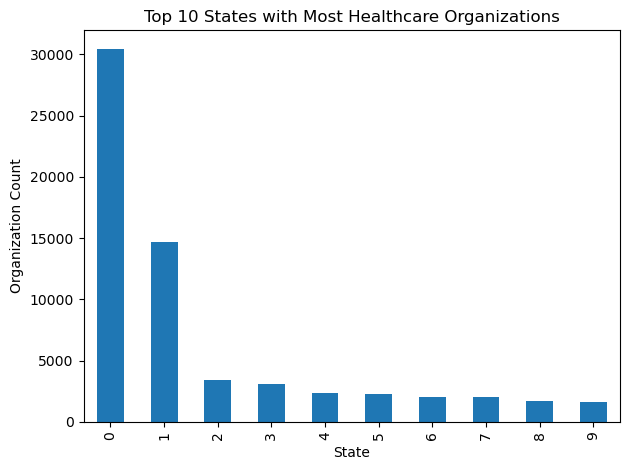

In [40]:
# Top 10 states with most Heathcare Orgs
state_counts.head(10).plot(kind='bar', y='org_count', legend=False)
plt.title('Top 10 States with Most Healthcare Organizations')
plt.xlabel('State')
plt.ylabel('Organization Count')
plt.tight_layout()
plt.show()